In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import wordcloud

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To mock web-browser and scrap tweets
from selenium import webdriver
from selenium.webdriver.common.keys import Keys


# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\r.bhardwaj\AppData\Roaming\nltk_data...
[nlt

In [2]:
data=pd.read_csv(r'uuccbbb.csv')


In [4]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1212345723972390912,1212345723972390912,1577880719000,2020-01-01,17:41:59,India Standard Time,702723120470228993,benetton_india,Benetton India,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '702723120470228993', 'username':...",NaN
1,1210854253650161664,1210854253650161664,1577525125000,2019-12-28,14:55:25,India Standard Time,702723120470228993,benetton_india,Benetton India,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '702723120470228993', 'username':...",NaN
2,1210854089833222144,1210854089833222144,1577525086000,2019-12-28,14:54:46,India Standard Time,702723120470228993,benetton_india,Benetton India,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '702723120470228993', 'username':...",NaN
3,1207920479358660609,1207920479358660609,1576825659000,2019-12-20,12:37:39,India Standard Time,702723120470228993,benetton_india,Benetton India,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '702723120470228993', 'username':...",NaN
4,1205754629516091392,1205754629516091392,1576309280000,2019-12-14,13:11:20,India Standard Time,702723120470228993,benetton_india,Benetton India,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '702723120470228993', 'username':...",NaN


In [5]:
required_data=data[['username','tweet']] 

In [6]:
required_data

,username,tweet
0,benetton_india,May you have the brightest 2020 ever! #HappyNe...
1,benetton_india,"With every purchase, you decide the future of ..."
2,benetton_india,United for a reason\n.\n.\n.\n#Benetton_india ...
3,benetton_india,"Add some layers of warmth, checks and primary ..."
4,benetton_india,Diksha Rawat sports her “Always fresh and alwa...
5,benetton_india,Things @rasnabhasin loves -\nVintage Cars \nCl...
6,benetton_india,A transformation\n#UnitedColorsOfBenetton #Uni...
7,benetton_india,FALL in love this season with subtle shades of...
8,benetton_india,Move in pastels. Own this effortlessly classic...
9,benetton_india,May the lights this Diwali show us the way and...


In [7]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [8]:
sentiments_using_textblob = required_data.tweet.apply(lambda tweets: fetch_sentiment_using_textblob(tweets))
pd.DataFrame(sentiments_using_textblob.value_counts())

,tweet
pos,1699
neg,142


In [9]:
required_data['sentiment'] = sentiments_using_textblob
required_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,username,tweet,sentiment
0,benetton_india,May you have the brightest 2020 ever! #HappyNe...,pos
1,benetton_india,"With every purchase, you decide the future of ...",pos
2,benetton_india,United for a reason\n.\n.\n.\n#Benetton_india ...,pos
3,benetton_india,"Add some layers of warmth, checks and primary ...",pos
4,benetton_india,Diksha Rawat sports her “Always fresh and alwa...,pos


In [10]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [11]:
required_data['tidy_tweets'] = np.vectorize(remove_pattern)(required_data['tweet'], "@[\w]*")
required_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,username,tweet,sentiment,tidy_tweets
0,benetton_india,May you have the brightest 2020 ever! #HappyNe...,pos,May you have the brightest 2020 ever! #HappyNe...
1,benetton_india,"With every purchase, you decide the future of ...",pos,"With every purchase, you decide the future of ..."
2,benetton_india,United for a reason\n.\n.\n.\n#Benetton_india ...,pos,United for a reason\n.\n.\n.\n#Benetton_india ...
3,benetton_india,"Add some layers of warmth, checks and primary ...",pos,"Add some layers of warmth, checks and primary ..."
4,benetton_india,Diksha Rawat sports her “Always fresh and alwa...,pos,Diksha Rawat sports her “Always fresh and alwa...
5,benetton_india,Things @rasnabhasin loves -\nVintage Cars \nCl...,pos,Things loves -\nVintage Cars \nClear Skies \n...
6,benetton_india,A transformation\n#UnitedColorsOfBenetton #Uni...,pos,A transformation\n#UnitedColorsOfBenetton #Uni...
7,benetton_india,FALL in love this season with subtle shades of...,pos,FALL in love this season with subtle shades of...
8,benetton_india,Move in pastels. Own this effortlessly classic...,pos,Move in pastels. Own this effortlessly classic...
9,benetton_india,May the lights this Diwali show us the way and...,pos,May the lights this Diwali show us the way and...


In [12]:
cleaned_tweets = []

for index, row in required_data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

required_data['tidy_tweets'] = cleaned_tweets
required_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,username,tweet,sentiment,tidy_tweets
0,benetton_india,May you have the brightest 2020 ever! #HappyNe...,pos,May you have the brightest 2020 ever! #HappyNe...
1,benetton_india,"With every purchase, you decide the future of ...",pos,"With every purchase, you decide the future of ..."
2,benetton_india,United for a reason\n.\n.\n.\n#Benetton_india ...,pos,United for a reason . . . #Benetton_india #uni...
3,benetton_india,"Add some layers of warmth, checks and primary ...",pos,"Add some layers of warmth, checks and primary ..."
4,benetton_india,Diksha Rawat sports her “Always fresh and alwa...,pos,Diksha Rawat sports her “Always fresh and alwa...
5,benetton_india,Things @rasnabhasin loves -\nVintage Cars \nCl...,pos,Things loves - Vintage Cars Clear Skies Colour...
6,benetton_india,A transformation\n#UnitedColorsOfBenetton #Uni...,pos,A transformation #UnitedColorsOfBenetton #Unit...
7,benetton_india,FALL in love this season with subtle shades of...,pos,FALL in love this season with subtle shades of...
8,benetton_india,Move in pastels. Own this effortlessly classic...,pos,Move in pastels. Own this effortlessly classic...
9,benetton_india,May the lights this Diwali show us the way and...,pos,May the lights this Diwali show us the way and...


In [13]:
required_data = required_data[required_data['tidy_tweets']!='']
required_data.head()

,username,tweet,sentiment,tidy_tweets
0,benetton_india,May you have the brightest 2020 ever! #HappyNe...,pos,May you have the brightest 2020 ever! #HappyNe...
1,benetton_india,"With every purchase, you decide the future of ...",pos,"With every purchase, you decide the future of ..."
2,benetton_india,United for a reason\n.\n.\n.\n#Benetton_india ...,pos,United for a reason . . . #Benetton_india #uni...
3,benetton_india,"Add some layers of warmth, checks and primary ...",pos,"Add some layers of warmth, checks and primary ..."
4,benetton_india,Diksha Rawat sports her “Always fresh and alwa...,pos,Diksha Rawat sports her “Always fresh and alwa...


In [14]:
#Removing Punctuations, Numbers and Special characters
required_data['absolute_tidy_tweets'] = required_data['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")
required_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,username,tweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,benetton_india,May you have the brightest 2020 ever! #HappyNe...,pos,May you have the brightest 2020 ever! #HappyNe...,May you have the brightest ever #HappyNew pic...
1,benetton_india,"With every purchase, you decide the future of ...",pos,"With every purchase, you decide the future of ...",With every purchase you decide the future of o...
2,benetton_india,United for a reason\n.\n.\n.\n#Benetton_india ...,pos,United for a reason . . . #Benetton_india #uni...,United for a reason #Benettonindia #unitedc...
3,benetton_india,"Add some layers of warmth, checks and primary ...",pos,"Add some layers of warmth, checks and primary ...",Add some layers of warmth checks and primary c...
4,benetton_india,Diksha Rawat sports her “Always fresh and alwa...,pos,Diksha Rawat sports her “Always fresh and alwa...,Diksha Rawat sports her Always fresh and alway...


In [15]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in required_data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
required_data['absolute_tidy_tweets'] = cleaned_tweets
required_data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,username,tweet,sentiment,tidy_tweets,absolute_tidy_tweets
0,benetton_india,May you have the brightest 2020 ever! #HappyNe...,pos,May you have the brightest 2020 ever! #HappyNe...,May brightest ever pictwittercomlHyajZj
1,benetton_india,"With every purchase, you decide the future of ...",pos,"With every purchase, you decide the future of ...",With every purchase decide future planet Choos...
2,benetton_india,United for a reason\n.\n.\n.\n#Benetton_india ...,pos,United for a reason . . . #Benetton_india #uni...,United reason
3,benetton_india,"Add some layers of warmth, checks and primary ...",pos,"Add some layers of warmth, checks and primary ...",Add layers warmth checks primary colours ready...
4,benetton_india,Diksha Rawat sports her “Always fresh and alwa...,pos,Diksha Rawat sports her “Always fresh and alwa...,Diksha Rawat sports Always fresh always ready ...
5,benetton_india,Things @rasnabhasin loves -\nVintage Cars \nCl...,pos,Things loves - Vintage Cars Clear Skies Colour...,Things loves Vintage Cars Clear Skies Colourfu...
6,benetton_india,A transformation\n#UnitedColorsOfBenetton #Uni...,pos,A transformation #UnitedColorsOfBenetton #Unit...,A transformation pictwittercomgRhUuYYMv
7,benetton_india,FALL in love this season with subtle shades of...,pos,FALL in love this season with subtle shades of...,FALL love season subtle shades pink AW Collect...
8,benetton_india,Move in pastels. Own this effortlessly classic...,pos,Move in pastels. Own this effortlessly classic...,Move pastels Own effortlessly classic pair sne...
9,benetton_india,May the lights this Diwali show us the way and...,pos,May the lights this Diwali show us the way and...,May lights Diwali show us way lead us together...


In [16]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

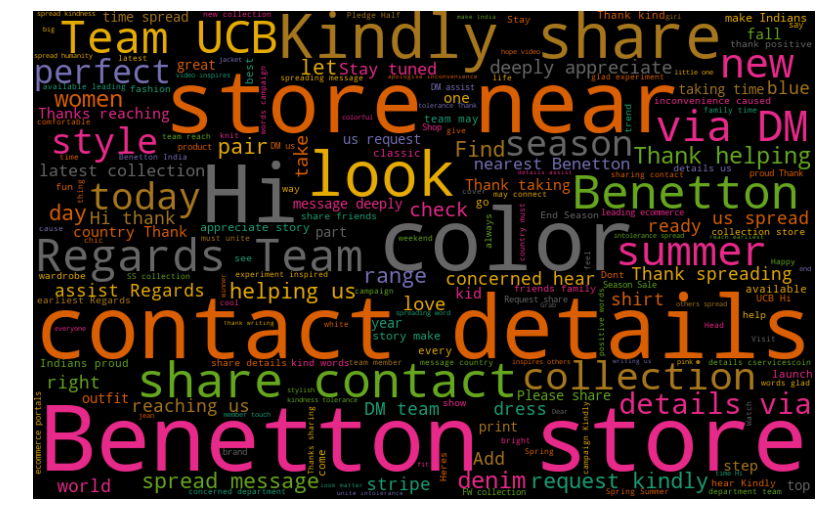

In [17]:
all_words = ' '.join([text for text in required_data['absolute_tidy_tweets'][required_data.sentiment == 'pos']])
generate_wordcloud(all_words)

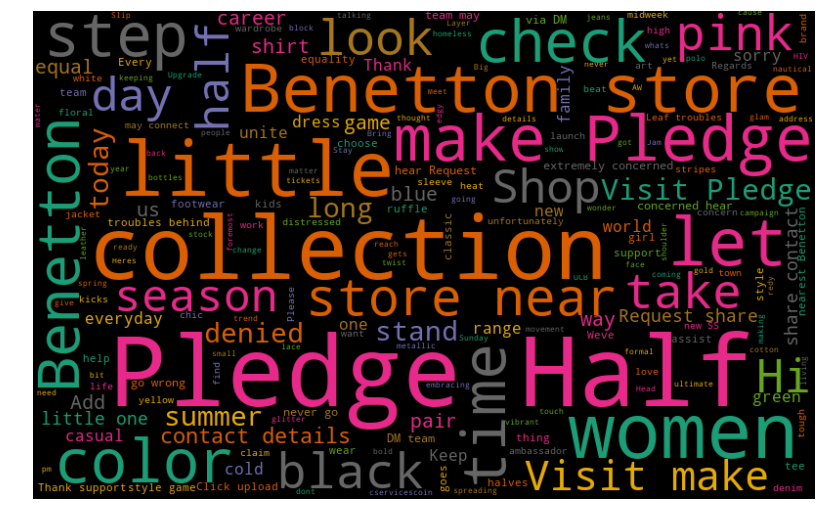

In [18]:
all_words = ' '.join([text for text in required_data['absolute_tidy_tweets'][required_data.sentiment == 'neg']])
generate_wordcloud(all_words)

In [43]:
required_data.to_csv('sentimentssss.csv')

In [21]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

In [22]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [24]:
key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in required_data.iterrows(): 
    toks = nltk.regexp_tokenize(row.tidy_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['may', 'brightest', 'appynew2020 pic', 'twitter', 'com'],
 ['purchase',
  'future',
  'planet',
  'choose',
  'enetton_india unitedcolorsofbenetton unitedcolorsofmood sustainablefashion responsiblefashion slowfashion'],
 ['united',
  'reason  . . enetton_india unitedcolorsofbenetton unitedcolorsofmood'],
 ['add',
  'layer',
  'warmth',
  'check',
  'primary colour',
  ' . .',
  'ootd',
  'ucb benettonindia stripestyle fridayfeels cozyclothes'],
 ['diksha rawat sport',
  'always fresh',
  'dream',
  'collection benetton saturdayvibes pic',
  'twitter',
  'com hqj19hiaso'],
 ['thing',
  ' - v intage car clear sky colourful sweater',
  'stripe',
  'enetton winterwear ootdstyle pic',
  'twitter',
  'com dhs5rnjxpn'],
 ['transformation unitedcolorsofbenetton unitedcolorsofbenettonindia bindia fashion thursdaymotivation pic',
  'twitter',
  'com grhuu0yymv'],
 ['fall',
  'love',
  'season',
  'subtle shade',
  'pink',
  'collection',
  'team tote',
  'team',
  'enettonaw19 toresnow benetto

In [26]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in required_data.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['may'],
 [],
 ['united'],
 [],
 ['diksha rawat sports', 'aw ’ 19 collection pic.twitter.com/hqj19hiaso'],
 ['vintage cars clear skies colourful sweaters',
  'stripes💚💙❤️ pic.twitter.com/dhs5rnjxpn'],
 ['transformation pic.twitter.com/grhuu0yymv'],
 ['aw ’ 19 collection', 'team tote', 'team backpack'],
 ['classic pair', 'nearest benetton store'],
 ['may lights', 'diwali show', 'benetton', 'spectacular diwali']]

In [28]:
required_data['key_phrases'] = textblob_key_phrases
required_data.head(10)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,username,tweet,sentiment,tidy_tweets,absolute_tidy_tweets,key_phrases
0,benetton_india,May you have the brightest 2020 ever! #HappyNe...,pos,May you have the brightest 2020 ever! #HappyNe...,May brightest ever pictwittercomlHyajZj,[may]
1,benetton_india,"With every purchase, you decide the future of ...",pos,"With every purchase, you decide the future of ...",With every purchase decide future planet Choos...,[]
2,benetton_india,United for a reason\n.\n.\n.\n#Benetton_india ...,pos,United for a reason . . . #Benetton_india #uni...,United reason,[united]
3,benetton_india,"Add some layers of warmth, checks and primary ...",pos,"Add some layers of warmth, checks and primary ...",Add layers warmth checks primary colours ready...,[]
4,benetton_india,Diksha Rawat sports her “Always fresh and alwa...,pos,Diksha Rawat sports her “Always fresh and alwa...,Diksha Rawat sports Always fresh always ready ...,"[diksha rawat sports, aw ’ 19 collection pic.t..."
5,benetton_india,Things @rasnabhasin loves -\nVintage Cars \nCl...,pos,Things loves - Vintage Cars Clear Skies Colour...,Things loves Vintage Cars Clear Skies Colourfu...,"[vintage cars clear skies colourful sweaters, ..."
6,benetton_india,A transformation\n#UnitedColorsOfBenetton #Uni...,pos,A transformation #UnitedColorsOfBenetton #Unit...,A transformation pictwittercomgRhUuYYMv,[transformation pic.twitter.com/grhuu0yymv]
7,benetton_india,FALL in love this season with subtle shades of...,pos,FALL in love this season with subtle shades of...,FALL love season subtle shades pink AW Collect...,"[aw ’ 19 collection, team tote, team backpack]"
8,benetton_india,Move in pastels. Own this effortlessly classic...,pos,Move in pastels. Own this effortlessly classic...,Move pastels Own effortlessly classic pair sne...,"[classic pair, nearest benetton store]"
9,benetton_india,May the lights this Diwali show us the way and...,pos,May the lights this Diwali show us the way and...,May lights Diwali show us way lead us together...,"[may lights, diwali show, benetton, spectacula..."


In [29]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

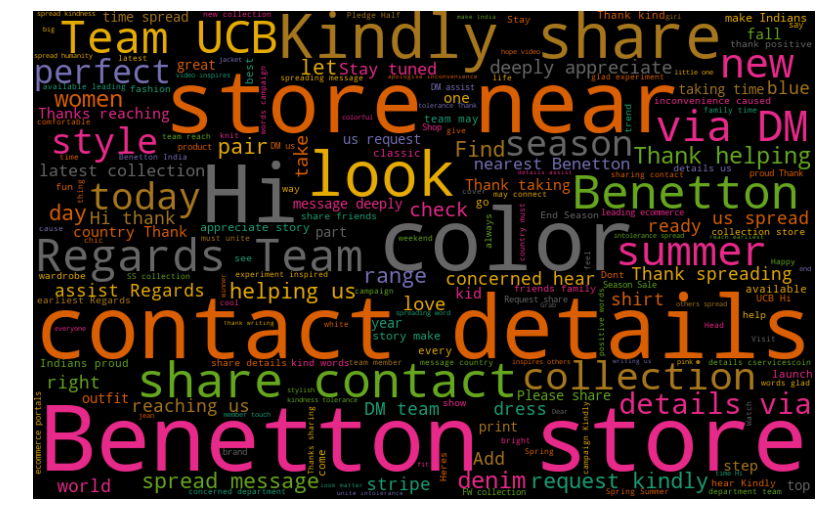

In [31]:
all_words = ' '.join([text for text in required_data['absolute_tidy_tweets'][required_data.sentiment == 'pos']])
generate_wordcloud(all_words)


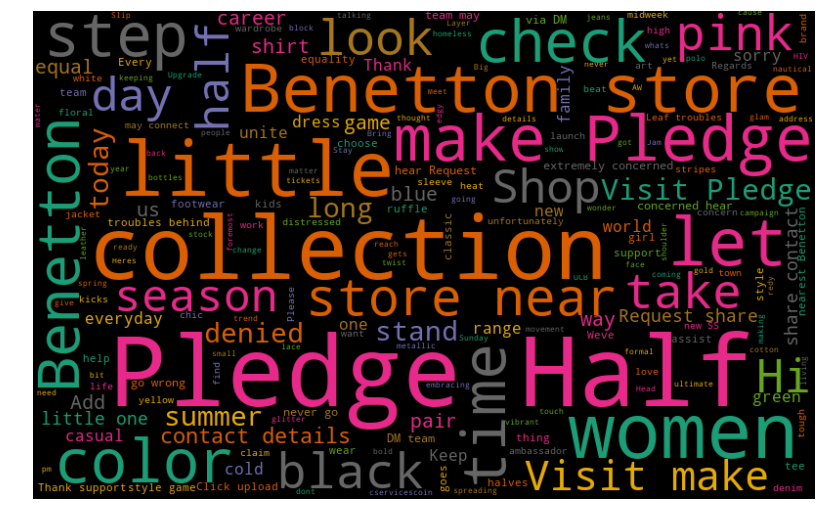

In [32]:
all_words = ' '.join([text for text in required_data['absolute_tidy_tweets'][required_data.sentiment == 'neg']])
generate_wordcloud(all_words)


In [33]:
import collections
filtered_words = [word for word in all_words.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

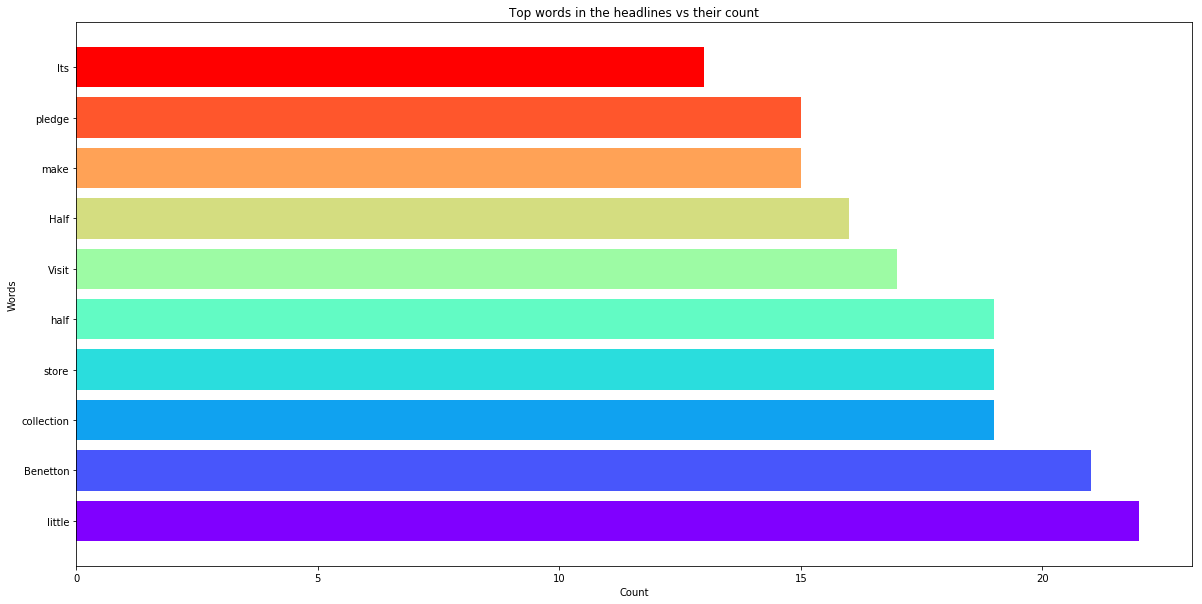

In [34]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [39]:
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

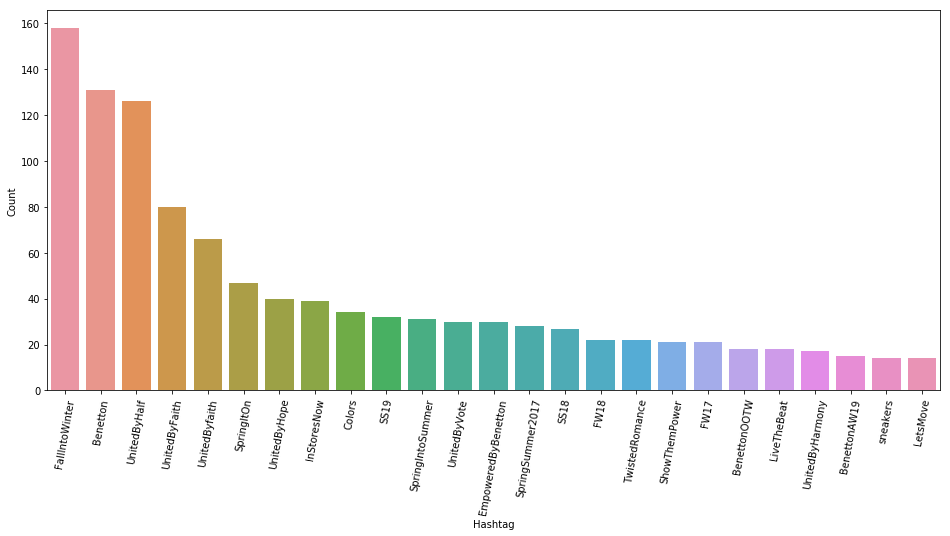

In [37]:
hashtags = hashtag_extract(required_data['tidy_tweets'])
hashtags = sum(hashtags, [])
generate_hashtag_freqdist(hashtags)